In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import os
import glob
import matplotlib.pyplot as plt

In [2]:
def plot_decision_regions(X, y, classifier, test_idx=None,
                         resolution=0.02):
    
    # resolutionはメモリの細かさ
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # Zはモデルからの予測値
    display(Z)
    # classifierは学習済みモデル
    Z = Z.reshape(xx1.shape)
    # reshapeで２次元配列にする
    # contorufで２軸上に境界線を書くために横軸と縦軸が必要
    display(Z)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    # contourfで境界線を引く,alphaは透明度
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        # enumerateで要素の数え上げのカウントとその値を返す
        
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=colors[idx],
                   marker=markers[idx], label=cl,
                   edgecolor='black')
        # Xの散布図
        
    if test_idx:
        print(test_idx)
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                   c='', edgecolor='black', alpha=1.0,
                   linewidth=1, marker='o',
                   s=100, label='test set')
        #実測位のプロット
        

In [3]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [4]:
display(df_wine)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
df_wine.columns = ['Class label', 'Alcohol',
                  'Malic acid', 'Ash',
                  'Alcalinity of ash', 'Magnesium',
                  'Total phenols', 'Flavanoids',
                  'Nonflavanoid phenols',
                  'Proanthocyanins',
                  'Color intensity', 'Hue',
                  'OD280/OD315 of diluted wines',
                  'Proline']
print('Class labels', np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [6]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=0,
                                                   stratify=y)
## stratify is class labels

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [10]:
ex = np.array([0, 1, 2, 3, 4, 5])
print('standardized:', (ex - ex.mean()) / ex.std())

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]


In [11]:
print('normalized:', (ex - ex.min()) / (ex.max() - ex.min()))

normalized: [0.  0.2 0.4 0.6 0.8 1. ]


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
#LogisticRegression(penalty='l1')

In [15]:
lr = LogisticRegression(penalty='l2', C=1.0)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train));
print('Test accuracy:', lr.score(X_test_std, y_test));

Training accuracy: 1.0
Test accuracy: 1.0


In [16]:
display(lr.intercept_)

array([ 0.36864899,  0.78042576, -1.14907476])

In [17]:
display(lr.coef_)

array([[ 0.78792017,  0.24090991,  0.44731358, -0.73488507,  0.11131899,
         0.22607309,  0.60649143, -0.14846826,  0.2412906 ,  0.14146002,
         0.1067172 ,  0.58063797,  0.98241228],
       [-0.95394452, -0.43669598, -0.7679318 ,  0.50645904, -0.17622726,
         0.07109671,  0.38810168,  0.09342089,  0.11351155, -0.91231504,
         0.61090074,  0.16781098, -1.09996903],
       [ 0.16602435,  0.19578606,  0.32061822,  0.22842603,  0.06490827,
        -0.2971698 , -0.99459311,  0.05504737, -0.35480216,  0.77085502,
        -0.71761794, -0.74844895,  0.11755675]])

In [18]:
X_combiend_std = np.vstack((X_train_std, X_test_std))
y_combiend = np.hstack((y_train, y_test))

-4.0
------
-3.0
------
-2.0
------
-1.0
------
0.0
------
1.0
------
2.0
------
3.0
------
4.0
------
5.0
------
13


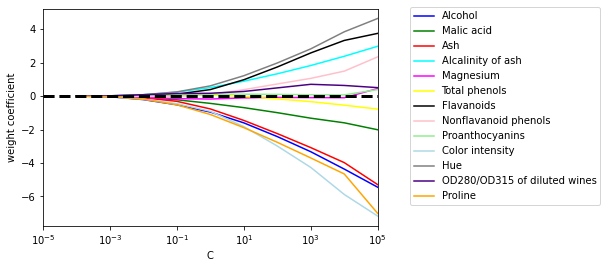

In [19]:
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan',
         'magenta', 'yellow', 'black',
         'pink', 'lightgreen', 'lightblue',
         'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
    print(c)
    print('------')
    lr = LogisticRegression(penalty='l2', C=10.**c,
                           random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
weights = np.array(weights)
print(weights.shape[1])
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
            label=df_wine.columns[column + 1],
            color=color)
    
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
         bbox_to_anchor=(1.38, 1.03),
         ncol=1, fancybox=True)
plt.show();

In [20]:
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score

In [21]:
class SBS():
    
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        #estimator is model.
        self.k_features = k_features
        #kは最終的に残ってほしい特徴量の数
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                           test_size=self.test_size,
                                                           random_state=self.random_state)
        #この中でデータセットを作って、そのスコアで特徴量を決めていく
        dim = X_train.shape[1]
        print('dim:{}'.format(dim))
        
        self.indices_ = tuple(range(dim))
        #indices_はcolumnだ
        display('self.indices:{}'.format(self.indices_))
        self.subsets_ = [self.indices_]
        display('self.subsets:{}'.format(self.subsets_))
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        display(score)
        
        self.scores_ = [score]
        #モデルの学習スコアを格納
        
        while dim > self.k_features:
            #dimがk_featuresより小さくなるまで繰り返す。
            #特徴量がk個に減るまで、dimはこの後減少していく
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r=dim -1):
                print('p:{}'.format(p))
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
                
            best = np.argmax(scores)
            #argmaxで要素数をだす、０から始まる
            self.indices_ = subsets[best]
            print('self.indices_:{}'.format(self.indices_))
            self.subsets_.append(self.indices_)
            print('self.subsets_in_for_loop:{}'.format(self.subsets_))
            #self.subsetsにdataframeのcolumn数に対応する要素が入っている
            dim -= 1
            print('dim:{}'.format(dim))
            
            self.scores_.append(scores[best])
            print('self.scores_in_for_loop:{}'.format(self.scores_))
        self.k_score_ = self.scores_[-1]
        print('self.k_score:{}'.format(self.k_score_))
        
        return self
    
    def transform(self, X):
        print('self.indices_:{}'.format(self.indices_))
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score
                

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

dim:13


'self.indices:(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)'

'self.subsets:[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)]'

0.967741935483871

p:(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)
p:(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12)
p:(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12)
p:(0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12)
p:(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12)
p:(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12)
p:(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)
p:(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12)
p:(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12)
p:(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)
p:(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
p:(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
p:(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
self.indices_:(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12)
self.subsets_in_for_loop:[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12)]
dim:12
self.scores_in_for_loop:[0.967741935483871, 1.0]
p:(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11)
p:(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12)
p:(0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12)
p:(0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12)
p:(0, 1, 2, 3, 4, 5, 6, 9, 10, 11, 12)
p:(0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12)
p:(0,

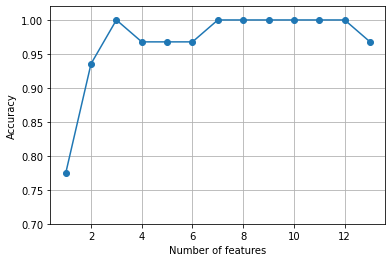

In [23]:
k_feat = [len(k) for k in sbs.subsets_]
#subsetsは特徴量のコラム数
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show();

In [24]:
print('k3 - sbs.subsets[10]:{}'.format(sbs.subsets_[10]))
#self.indicesが１０回転目がベスト

k3 - sbs.subsets[10]:(0, 1, 11)


In [25]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')
